In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from scipy import stats




In [17]:
train_data = pd.read_csv("/content/drive/MyDrive/univai/Training Data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/univai/Test Data.csv")

In [18]:
data = train_data

In [19]:
data.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063863,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


## Expleratory Data Analysis


###checking for the missing Value

In [20]:
data.isnull().sum()

Id                     0
income                 0
age                    0
experience             0
married                0
house_ownership        0
car_ownership          0
profession             0
city                   0
state                  0
current_job_years      0
current_house_years    0
risk_flag              0
dtype: int64

##### There are no Missing values 

##### relationship between car ownership and Loan default

In [21]:
data["married"]

0          single
1          single
2         married
3          single
4          single
           ...   
251995     single
251996     single
251997     single
251998     single
251999     single
Name: married, Length: 252000, dtype: object

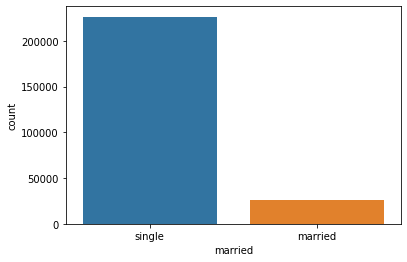

In [22]:
sns.countplot(data = data,x = "married",)


In [23]:
# most of them who have taken loan are not married
data["married"].value_counts()

#only around 25thounsand among all are married 

single     226272
married     25728
Name: married, dtype: int64

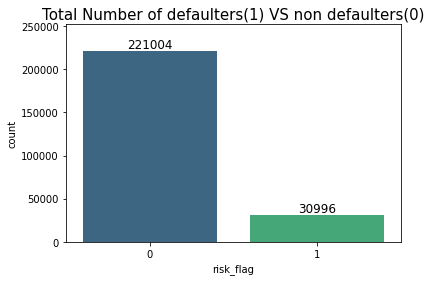

In [24]:
sns.countplot(x="risk_flag", data=data, palette="viridis")
ax = plt.gca()

y_max = data["risk_flag"].value_counts().max()
ax.set_ylim([0,252000])

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom')
    
plt.title('Total Number of defaulters(1) VS non defaulters(0)',size='15')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


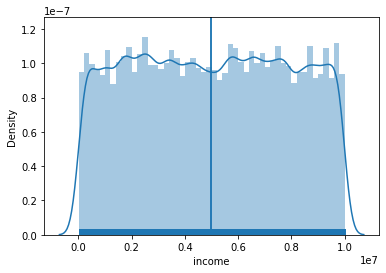

In [25]:
#Income distribution 
sns.distplot(data["income"], kde=True, rug=True);
plt.axvline(np.median(data["income"]))
plt.axvline(np.mean(data["income"],))

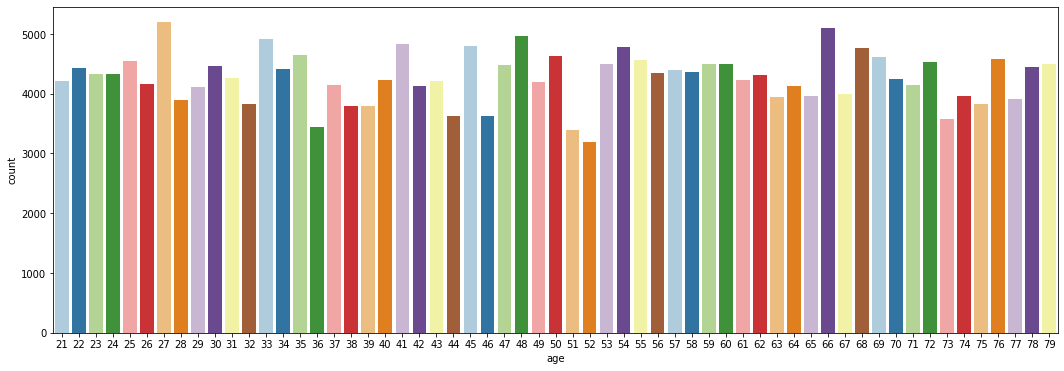

In [26]:
plt.figure(figsize=(18,6))
sns.countplot(data= data, x = "age", palette = "Paired")


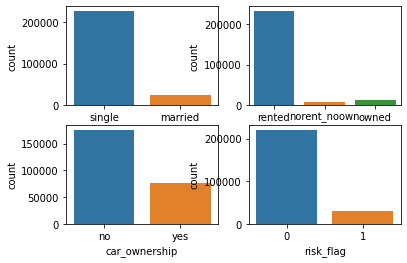

In [27]:
fig, axs = plt.subplots(ncols=2, nrows=2, )
sns.countplot(x='married', data=data, ax=axs[0][0])
sns.countplot(x='house_ownership', data=data, ax=axs[0][1])
sns.countplot(x='car_ownership', data=data, ax=axs[1][0])
sns.countplot(x='risk_flag', data=data, ax=axs[1][1])

In [28]:
data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


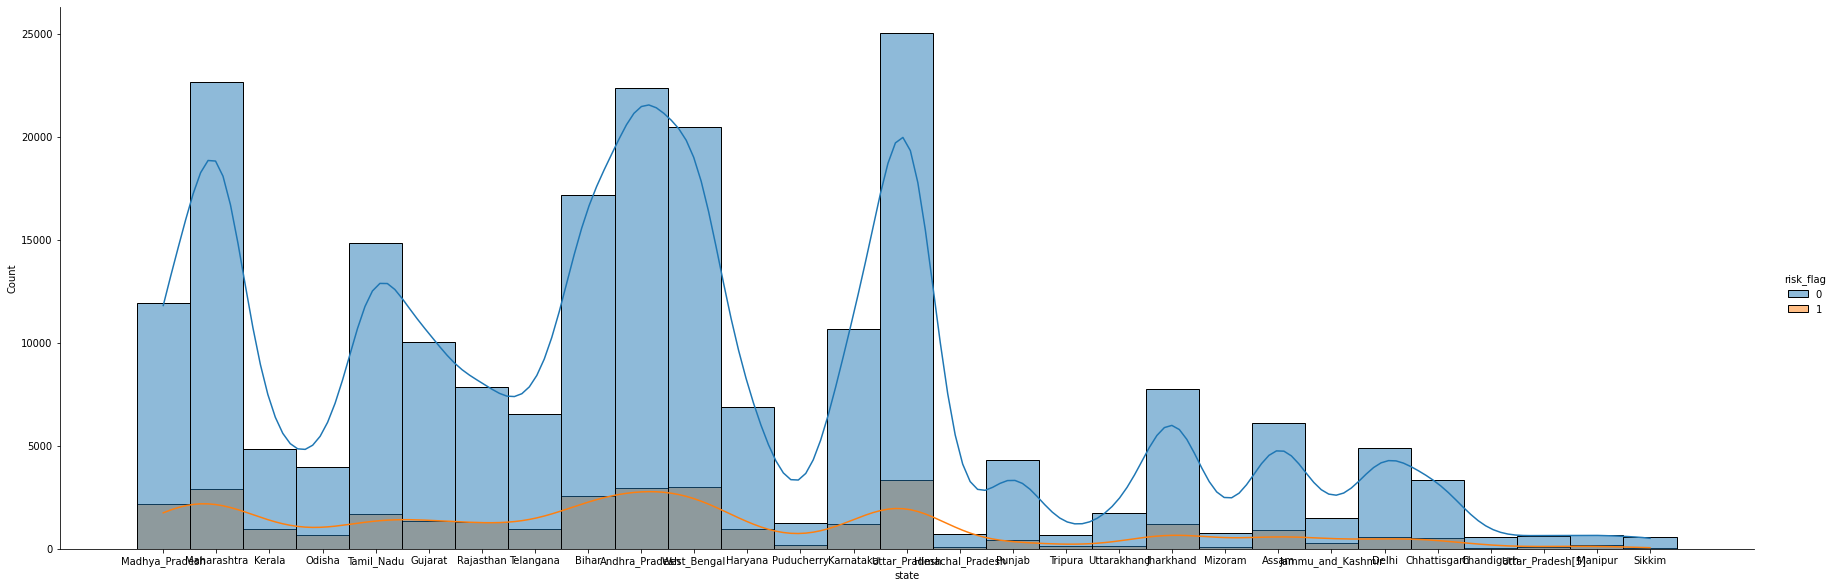

In [29]:
# defaulters And Non defaulters


sns.displot( ax = ax, data=data, x="state",  kde=True, hue = "risk_flag", height=8.27, aspect=30/10 )


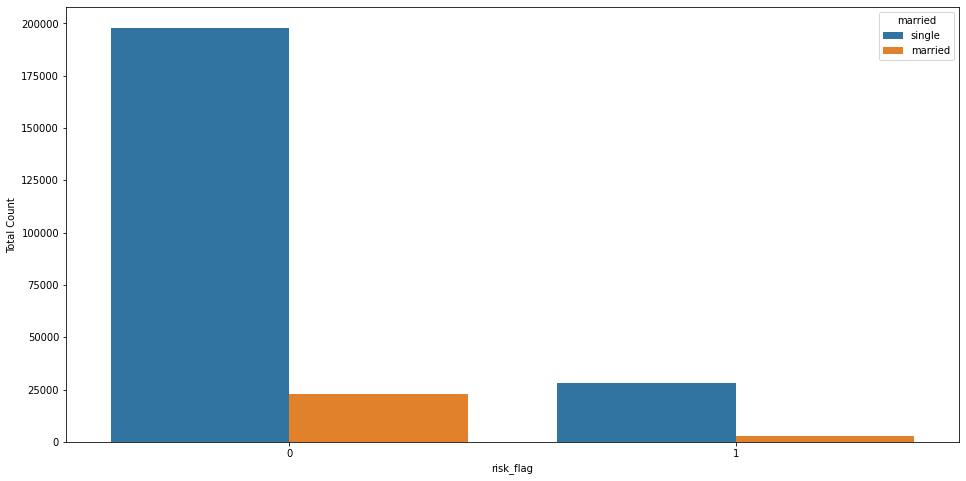

In [30]:
# Risk_flag compariosn between married and unmarried

plt.figure(figsize=(16,8))
ax = sns.countplot(x = 'risk_flag', data = data,hue = 'married', )
plt.xlabel("risk_flag")
plt.ylabel("Total Count")
plt.show()

    
plt.show()

In [31]:
data['married'].value_counts()

single     226272
married     25728
Name: married, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


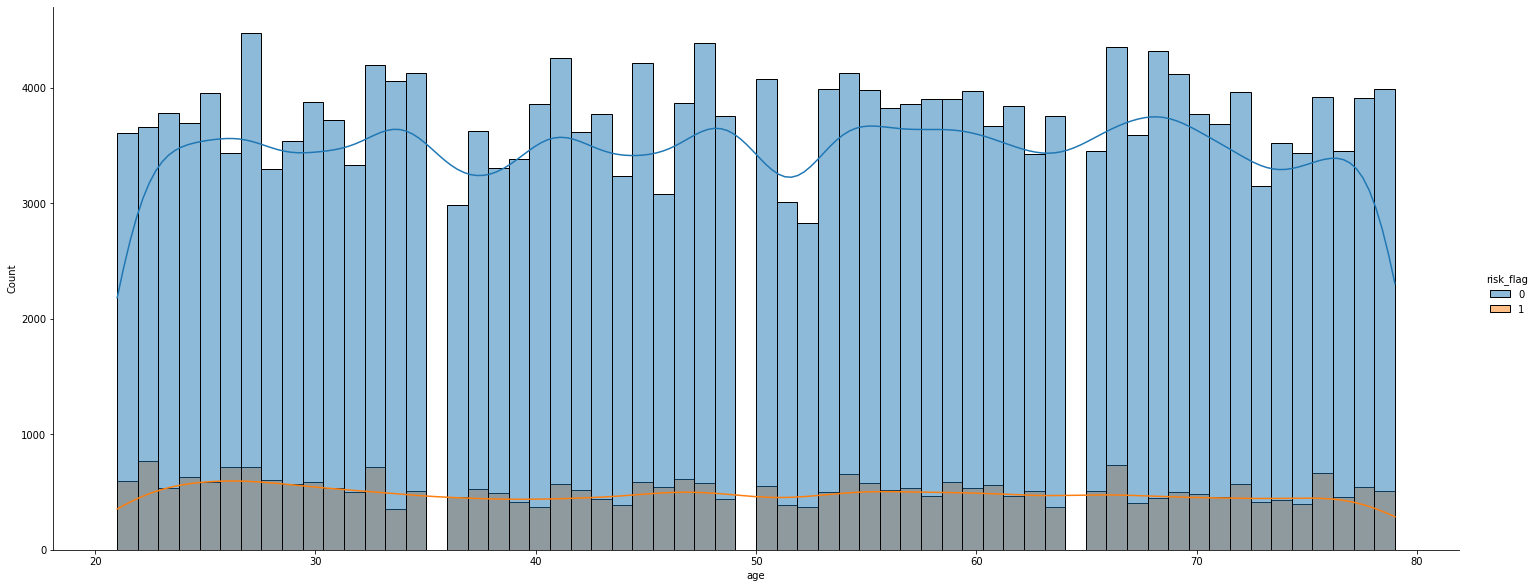

In [32]:
#riskflag at certaon ages 

sns.displot( ax = ax, data=data, x="age",  kde=True, hue = "risk_flag", height=8.27, aspect=20/8 )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


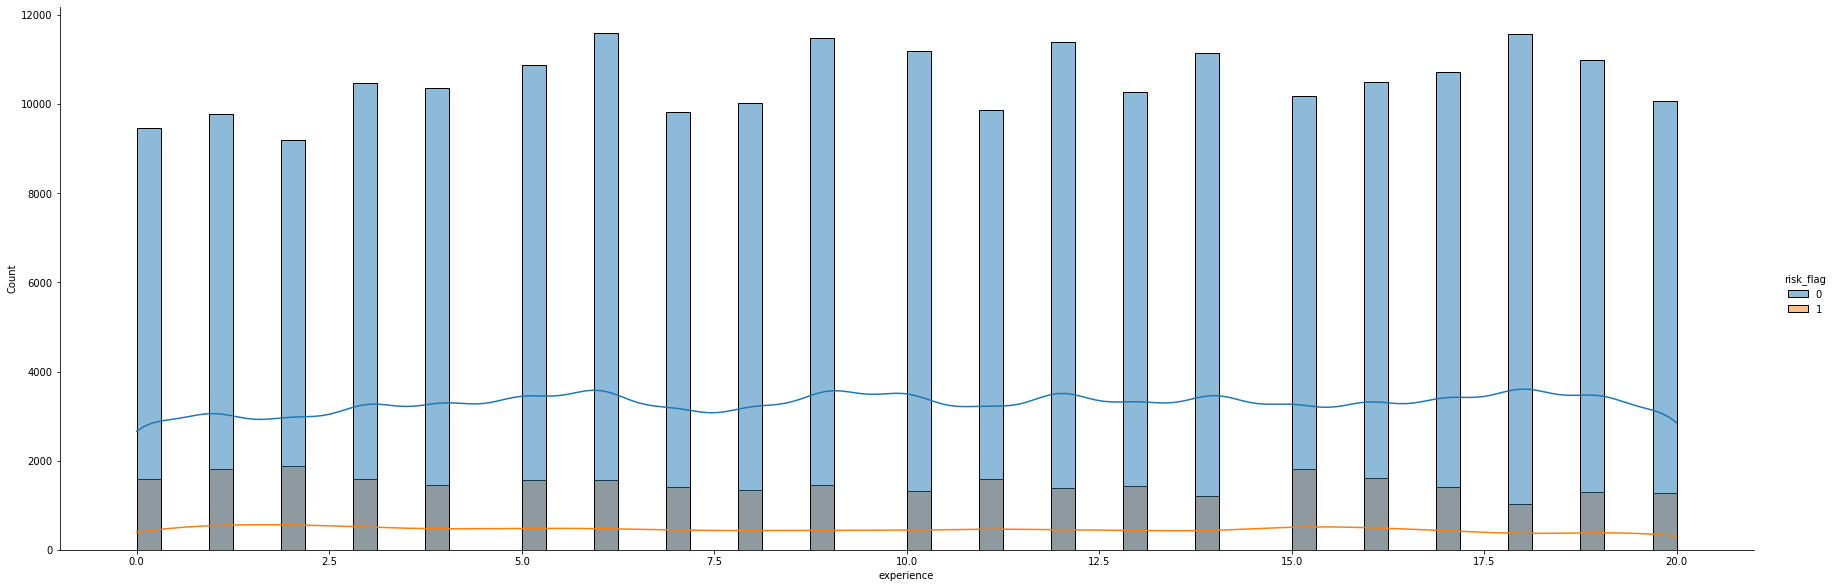

In [33]:
#risk_flag among the experienced 

sns.displot( ax = ax, data=data, x="experience",  kde=True, hue = "risk_flag", height=8.27, aspect=30/10 )


In [34]:
#most common profession 


## Analysis about Defaulters

In [35]:
defaulter = data[data.risk_flag == 1]
defaulter.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
14,15,9420838,48,6,single,rented,no,Technical_writer,Madurai,Tamil_Nadu,6,10,1
17,18,3666346,56,12,single,rented,no,Politician,Bhusawal,Maharashtra,12,11,1
28,29,8832725,64,5,single,rented,no,Biomedical_Engineer,Pondicherry,Puducherry,5,11,1


In [36]:
defaulter.describe()

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,30996.000000,3.099600e+04,30996.00000,30996.000000,30996.000000,30996.000000,30996.0
mean,132246.261711,4.973359e+06,48.96035,9.531101,6.168893,11.981449,1.0
std,80585.131183,2.921065e+06,17.36874,6.071810,3.748200,1.400140,0.0
min,4.000000,1.067500e+04,21.00000,0.000000,0.000000,10.000000,1.0
25%,60103.750000,2.421029e+06,33.00000,4.000000,3.000000,11.000000,1.0
50%,138138.500000,4.977653e+06,49.00000,9.000000,6.000000,12.000000,1.0
75%,213395.250000,7.556052e+06,64.00000,15.000000,9.000000,13.000000,1.0
max,251994.000000,9.994501e+06,79.00000,20.000000,14.000000,14.000000,1.0


In [37]:
defaulter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30996 entries, 3 to 251993
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   30996 non-null  int64 
 1   income               30996 non-null  int64 
 2   age                  30996 non-null  int64 
 3   experience           30996 non-null  int64 
 4   married              30996 non-null  object
 5   house_ownership      30996 non-null  object
 6   car_ownership        30996 non-null  object
 7   profession           30996 non-null  object
 8   city                 30996 non-null  object
 9   state                30996 non-null  object
 10  current_job_years    30996 non-null  int64 
 11  current_house_years  30996 non-null  int64 
 12  risk_flag            30996 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 3.3+ MB


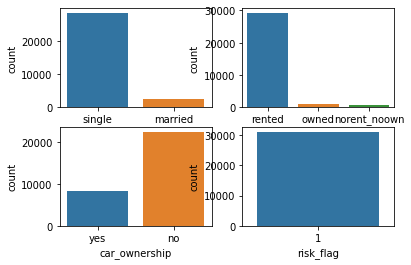

In [38]:


fig, axs = plt.subplots(ncols=2, nrows=2, )
sns.countplot(x='married', data=defaulter, ax=axs[0][0])
sns.countplot(x='house_ownership', data=defaulter, ax=axs[0][1])
sns.countplot(x='car_ownership', data=defaulter, ax=axs[1][0])
sns.countplot(x='risk_flag', data=defaulter, ax=axs[1][1])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


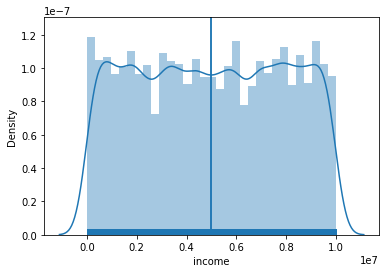

In [39]:
#Income among the defaulters
sns.distplot(defaulter["income"], kde=True, rug=True);
plt.axvline(np.median(defaulter["income"]))
plt.axvline(np.mean(defaulter["income"],))


In [40]:
# most common profession among the defaulters
most_common_profession = defaulter["profession"].value_counts().to_frame()
most_common_profession

,profession
Police_officer,826
Software_Developer,750
Air_traffic_controller,715
Surveyor,714
Physician,710
Army_officer,709
Hotel_Manager,701
Technical_writer,697
Scientist,690
Computer_hardware_engineer,690


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


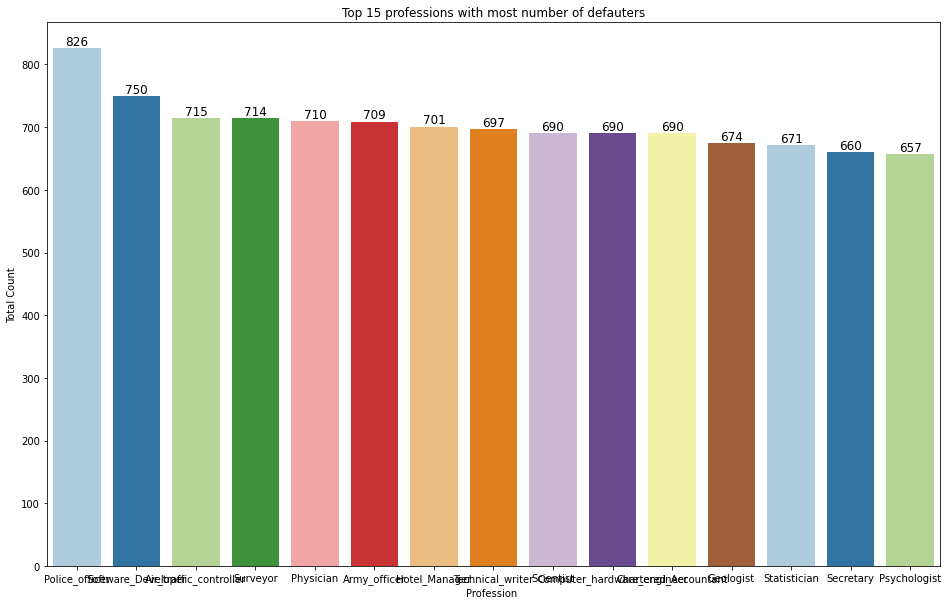

In [41]:
plt.figure(figsize=(16,10))
ax = sns.countplot(defaulter.profession, order=most_common_profession.index[0:15] ,palette="Paired")
plt.title("Top 15 professions with most number of defauters")
plt.xlabel("Profession ")
plt.ylabel("Total Count")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2. , p.get_height(), "%d" % int(p.get_height()), 
            fontsize = 12, color = "black", ha = "center", va = "bottom")


plt.show()

In [42]:
#most common age of defaulters 
most_common_age = defaulter["age"].value_counts().to_frame()
most_common_age.head()

,age
22,770
66,737
27,720
33,719
26,719


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


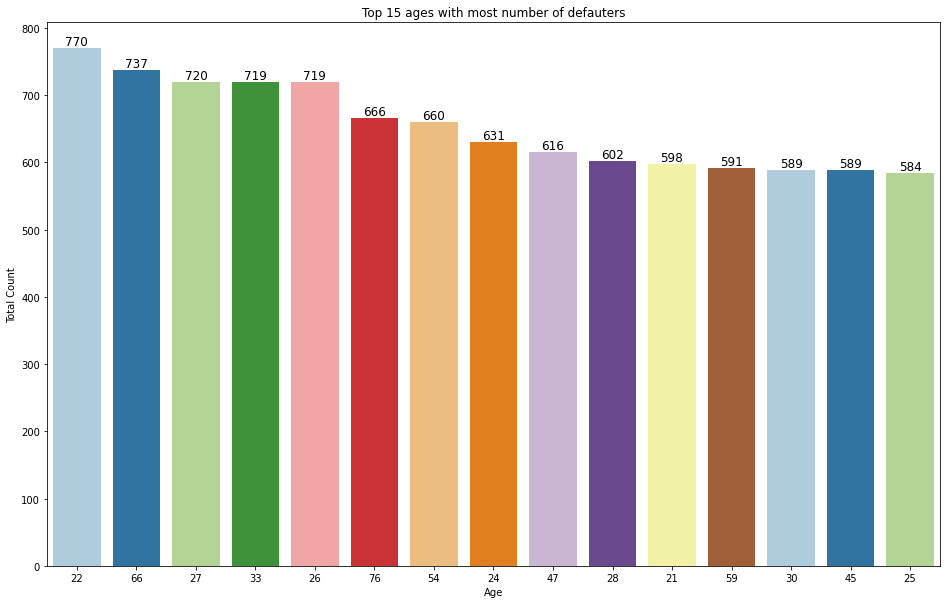

In [43]:
plt.figure(figsize=(16,10))
ax = sns.countplot(defaulter.age, order=most_common_age.index[0:15] , palette="Paired")
plt.title("Top 15 ages with most number of defauters")
plt.xlabel("Age")
plt.ylabel("Total Count")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2. , p.get_height(), "%d" % int(p.get_height()), 
            fontsize = 12, color = "black", ha = "center", va = "bottom")


plt.show()

In [44]:
#city with most number of defaulters 
most_common_city = defaulter["city"].value_counts().to_frame()
most_common_city


,city
Kochi,243
Satna,232
Buxar[37],228
Srinagar,216
Indore,212
...,...
Dehradun,23
Katni,21
Bijapur,20
Sultan_Pur_Majra,18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


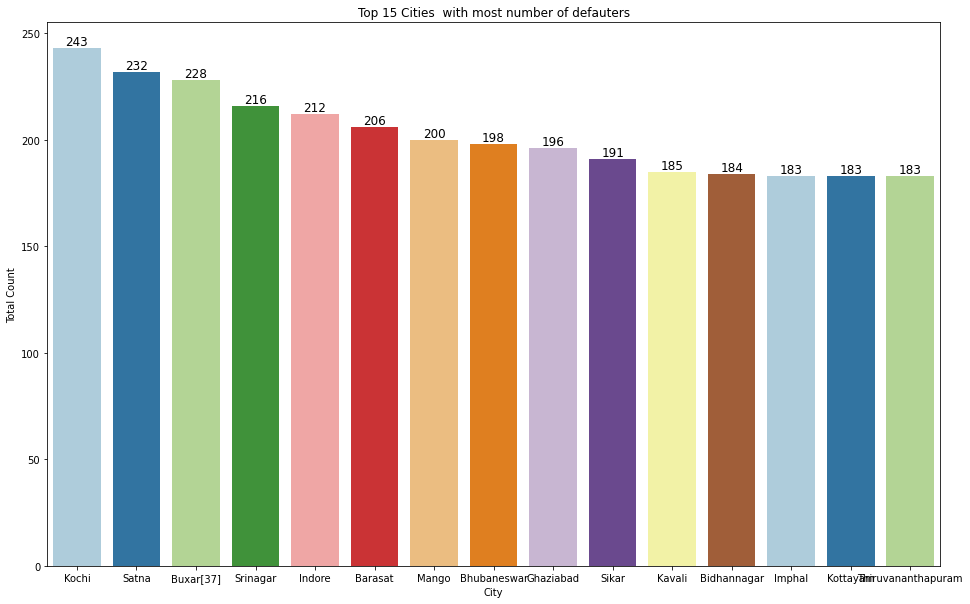

In [45]:
plt.figure(figsize=(16,10))
ax = sns.countplot(defaulter.city, order=most_common_city.index[0:15] , palette="Paired")
plt.title("Top 15 Cities  with most number of defauters")
plt.xlabel("City")
plt.ylabel("Total Count")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2. , p.get_height(), "%d" % int(p.get_height()), 
            fontsize = 12, color = "black", ha = "center", va = "bottom")


plt.show()

In [46]:
#like wise, lets check the same for States
most_common_state = defaulter["state"].value_counts().to_frame()
most_common_state

,state
Uttar_Pradesh,3343
West_Bengal,3009
Andhra_Pradesh,2935
Maharashtra,2895
Bihar,2583
Madhya_Pradesh,2180
Tamil_Nadu,1706
Gujarat,1343
Rajasthan,1292
Jharkhand,1195


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


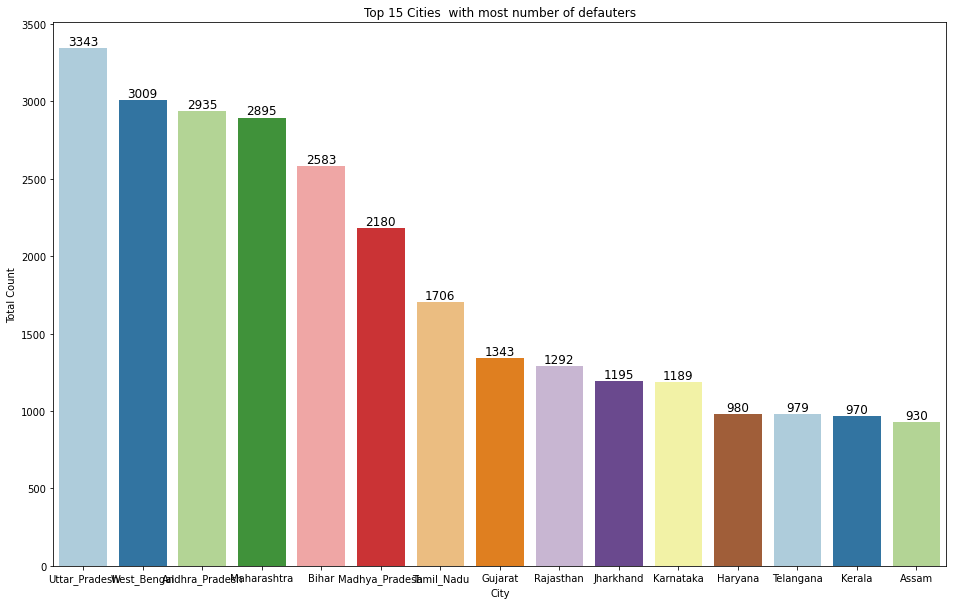

In [47]:
plt.figure(figsize=(16,10))
ax = sns.countplot(defaulter.state, order=most_common_state.index[0:15] , palette="Paired")
plt.title("Top 15 Cities  with most number of defauters")
plt.xlabel("City")
plt.ylabel("Total Count")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2. , p.get_height(), "%d" % int(p.get_height()), 
            fontsize = 12, color = "black", ha = "center", va = "bottom")


plt.show()

# handling the data


In [49]:
train_data = pd.read_csv("/content/drive/MyDrive/univai/Training Data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/univai/Test Data.csv")

In [50]:
# getting dummy variabels
train_data = pd.get_dummies(data=train_data, columns=["married", 	"house_ownership" ,	"car_ownership" ,	"profession" ,	"city" ,	"state"])
test_data = pd.get_dummies(data=test_data, columns=["married", 	"house_ownership" ,	"car_ownership" ,	"profession" ,	"city" ,	"state"])

In [52]:
# Using Min max scaler for test data
cols_to_scale = ["income" ,	"age" 	,"experience","current_job_years", 	"current_house_years" ]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[cols_to_scale] = scaler.fit_transform(train_data[cols_to_scale])
test_data[cols_to_scale] = scaler.fit_transform(test_data[cols_to_scale])

In [53]:
xtrain= train_data.drop(['risk_flag', "Id" ],axis='columns')
ytrain = testLabels = train_data.risk_flag

xtest = test_data.drop([ "id" ],axis='columns')


### I have done some hyperparameter tuning in other notbook, in this i have just implemented it 

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf=RandomForestClassifier(n_estimators=1600,max_depth=110)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=110, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
y_pred=rf.predict(xtest)

In [60]:
prediction = pd.DataFrame( y_pred,columns=["risk_flag"]).to_csv('prediction.csv', index = True)

## I have learned a lot during this hacathon, Thank you 